In [1]:
# from PIL import Image, ImageDraw
# import numpy as np

In [2]:
# im = Image.open('FashionDataset/img/00006.jpg')
# im_hf = im.transpose(PIL.Image.FLIP_LEFT_RIGHT)

In [3]:
# Image.fromarray(np.hstack((np.array(im),np.array(im_hf)))).show()
# img1 = ImageDraw.Draw(im)

In [4]:
# img1.rectangle([34, 69, 80, 156], outline='red', width=2)
# im.show()

In [5]:
# bbox = [34, 69, 80, 156]

In [6]:
# import math
# from PIL import Image, ImageDraw
  
# w, h = 220, 190
# shape = [(40, 40), (w - 10, h - 10)]
  
# # creating new Image object
# img = Image.new("RGB", (w, h))
  
# # create line image
# img1 = ImageDraw.Draw(img)  
# img1.line(shape, fill ="none", width = 0)
# img.show()

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
files = os.listdir('csv')

In [9]:
def parse_df(model):
    df = pd.read_csv('csv/'+model)
    df = df[['Unnamed: 1',
     'Unnamed: 2','1','2','3','4','5','6','7','8','9','10',
     '11','12','13','14','15','16','17','18','19','20','21',
     '22','23','24','25','26','27','28','29']]
    df = df.loc[df['Unnamed: 2']=='value']
    df = df.drop(columns=['Unnamed: 2'], axis=1)
    df = df.set_index('Unnamed: 1')
    df = df.T
    return df

In [38]:
resnet_0 = parse_df('resnet_0.csv')
resnet_2 = parse_df('resnet_2.csv')
resnet_4 = parse_df('resnet_4.csv')
se_resnet_0 = parse_df('se_resnet_0.csv')
se_resnet_2 = parse_df('se_resnet_2.csv')
se_resnet_4 = parse_df('se_resnet_4.csv')
se_resnext_0 = parse_df('se_resnext_0.csv')
se_resnext_2 = parse_df('se_resnext_2.csv')
se_resnext_4 = parse_df('se_resnext_4.csv')

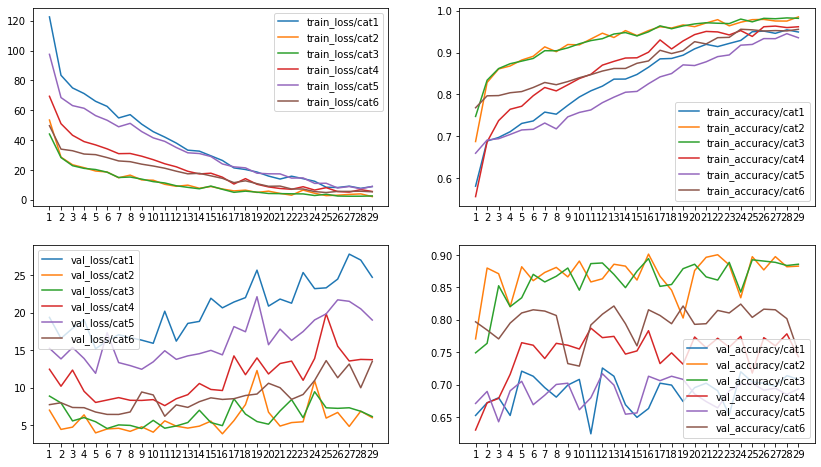

In [39]:
"""
ResNet 0 FC layers
"""
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 8))
ax1.plot(resnet_0[['train_loss/cat1', 'train_loss/cat2', 'train_loss/cat3',
                  'train_loss/cat4', 'train_loss/cat5', 'train_loss/cat6']])
ax1.legend(['train_loss/cat1', 'train_loss/cat2', 'train_loss/cat3',
                  'train_loss/cat4', 'train_loss/cat5', 'train_loss/cat6'], loc='upper right')
# ax1.get_xaxis().set_visible(False)

ax2.plot(resnet_0[['train_accuracy/cat1', 'train_accuracy/cat2', 'train_accuracy/cat3',
                  'train_accuracy/cat4', 'train_accuracy/cat5', 'train_accuracy/cat6']])
ax2.legend(['train_accuracy/cat1', 'train_accuracy/cat2', 'train_accuracy/cat3',
                  'train_accuracy/cat4', 'train_accuracy/cat5', 'train_accuracy/cat6'], loc='lower right')
# ax2.get_xaxis().set_visible(False)

ax3.plot(resnet_0[['val_loss/cat1', 'val_loss/cat2', 'val_loss/cat3',
                  'val_loss/cat4', 'val_loss/cat5', 'val_loss/cat6']])
ax3.legend(['val_loss/cat1', 'val_loss/cat2', 'val_loss/cat3',
                  'val_loss/cat4', 'val_loss/cat5', 'val_loss/cat6'], loc='best')
# ax2.get_xaxis().set_visible(False)

ax4.plot(resnet_0[['val_accuracy/cat1', 'val_accuracy/cat2', 'val_accuracy/cat3',
                  'val_accuracy/cat4', 'val_accuracy/cat5', 'val_accuracy/cat6']])
ax4.legend(['val_accuracy/cat1', 'val_accuracy/cat2', 'val_accuracy/cat3',
                  'val_accuracy/cat4', 'val_accuracy/cat5', 'val_accuracy/cat6'], loc='best')
# ax2.get_xaxis().set_visible(False)

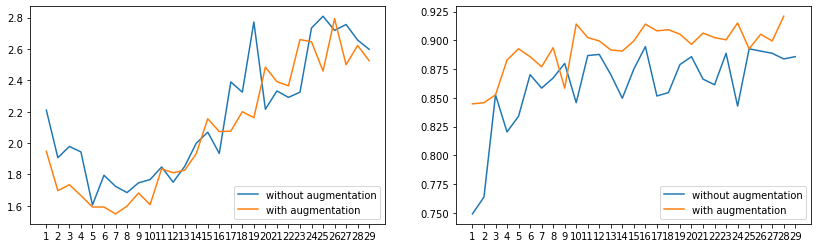

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
ax1.plot(pd.concat([resnet_0['val_loss/avg'], se_resnet_0['val_loss/avg']], axis=1))
ax1.legend(['without augmentation', 'with augmentation'], loc='lower right')
# ax1.get_xaxis().set_visible(False)

ax2.plot(pd.concat([resnet_0['val_accuracy/cat3'], se_resnet_0['val_accuracy/cat3']], axis=1))
ax2.legend(['without augmentation', 'with augmentation'], loc='lower right')
# ax2.get_xaxis().set_visible(False)

Unnamed: 1
val_accuracy/cat1    0.725586
val_accuracy/cat2    0.901367
val_accuracy/cat3    0.894531
val_accuracy/cat4    0.787109
val_accuracy/cat5    0.716797
val_accuracy/cat6    0.824219
dtype: float64
Unnamed: 1
val_accuracy/cat1    0.745117
val_accuracy/cat2    0.911133
val_accuracy/cat3    0.920898
val_accuracy/cat4    0.788086
val_accuracy/cat5    0.730469
val_accuracy/cat6    0.832031
dtype: float64


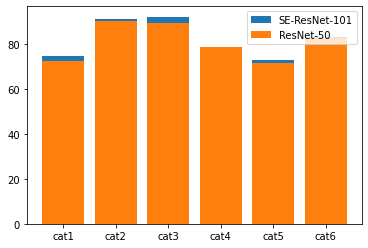

In [62]:
cats = ['val_accuracy/cat1', 'val_accuracy/cat2', 'val_accuracy/cat3',
       'val_accuracy/cat4', 'val_accuracy/cat5', 'val_accuracy/cat6']
print(resnet_0[cats].max())
print(se_resnet_0[cats].max())

bins = ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6']
plt.bar(bins, [100*x for x in list(se_resnet_0[cats].max())], alpha=1, label='SE-ResNet-101')
plt.bar(bins, [100*x for x in list(resnet_0[cats].max())], alpha=1, label='ResNet-50')
plt.legend()

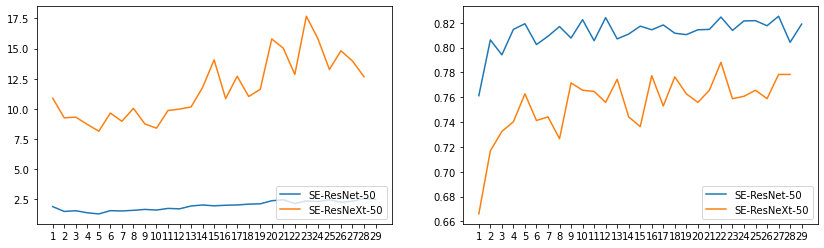

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
ax1.plot(pd.concat([se_resnext_0['val_loss/avg'], se_resnet_0['val_loss/cat4']], axis=1))
ax1.legend(['SE-ResNet-50', 'SE-ResNeXt-50'], loc='lower right')
# ax1.get_xaxis().set_visible(False)

ax2.plot(pd.concat([se_resnext_0['val_accuracy/avg'], se_resnet_0['val_accuracy/cat4']], axis=1))
ax2.legend(['SE-ResNet-50', 'SE-ResNeXt-50'], loc='lower right')
# ax2.get_xaxis().set_visible(False)